In [1]:
import dimelo as dm
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import pysam
import time

In [2]:
import sys
print(sys.executable)

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/bin/python


In [3]:
# stuff for the dimelo dev testing

combined_bam_filepath = '/clusterfs/nilah/oberon/downloads/prod_CTCF_winnowmap_guppy_merge.sorted.bam'
megalodon_bam_filepath = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.sorted.bam'
two_color_r9 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/lmnb1-accessibility_20220214_megalodon/barcode10_rabbit-abcam/mod_mappings.10.sorted.bam'
test_r10 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/r10/Dorado_R10_calls.bam'
hp1_bam_filepath = '/clusterfs/nilah/oberon/downloads/phased/ALLCTCF_guppy_winnowmap_merge_chr11_NanoMethPhase_HP1.bam'
hp2_bam_filepath = '/clusterfs/nilah/oberon/downloads/phased/ALLCTCF_guppy_winnowmap_merge_chr11_NanoMethPhase_HP2.bam'
pacbio_bam_filepath = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/PacBio/GM12878.CENPC.cell1.winnowmap.sorted.bam'
output_dir = '/clusterfs/nilah/oberon/dimelo_dev_source/test_outputs/'
sql_output = 'test_output'
hp1_sample_name = 'gm12878_ctcf_hp1'
genome_path = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/genomes/chm13.draft_v1.0.fasta'
v1_1_genome_path = '/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta'
hg38_genome_path = '/clusterfs/nilah/ayesha/basenji/baselines/gm12878/data/hg38.fa'



In [ ]:
#dm.qc_report(megalodon_bam_filepath,'test',output_dir)

In [ ]:
start_time = time.time()
(pile_coordinates,valid_pile_dict,modified_pile_dict) = dm.parse_bam(
    megalodon_bam_filepath,
    'test',output_dir,
    basemods=('N:A+m:N','N:C+m:G'),
    region='chr11:5816896-6046272',
    referenceGenome=genome_path,
    validate_with_reference=True,
)
end_time = time.time()
print(end_time-start_time)

In [19]:
start_time = time.time()
(pile_coordinates,valid_pile_dict,modified_pile_dict) = dm.parse_bam(
    megalodon_bam_filepath,
    'test',output_dir,
    basemods=('N:A+m:N','N:C+m:G'),
    region='chr11:5816896-6046272',
    referenceGenome=genome_path,
    checkAgainstRef=True,
)
end_time = time.time()
print(end_time-start_time)

total and per core: 9362494 302016
{0: {<dimelo.utils.genome_regions.Region object at 0x2b34238dd210>: [(<dimelo.utils.genome_regions.Region object at 0x2b342176d690>, 'first')]}, 1: {<dimelo.utils.genome_regions.Region object at 0x2b34238dd210>: [(<dimelo.utils.genome_regions.Region object at 0x2b3423681510>, 'internal')]}, 2: {<dimelo.utils.genome_regions.Region object at 0x2b34238dd210>: [(<dimelo.utils.genome_regions.Region object at 0x2b3423681750>, 'internal')]}, 3: {<dimelo.utils.genome_regions.Region object at 0x2b34238dd210>: [(<dimelo.utils.genome_regions.Region object at 0x2b3423681190>, 'internal')]}, 4: {<dimelo.utils.genome_regions.Region object at 0x2b34238dd210>: [(<dimelo.utils.genome_regions.Region object at 0x2b342176d890>, 'internal')]}, 5: {<dimelo.utils.genome_regions.Region object at 0x2b34238dd210>: [(<dimelo.utils.genome_regions.Region object at 0x2b342176d750>, 'internal')]}, 6: {<dimelo.utils.genome_regions.Region object at 0x2b34238dd210>: [(<dimelo.utils.ge

mA plots and comparisons

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


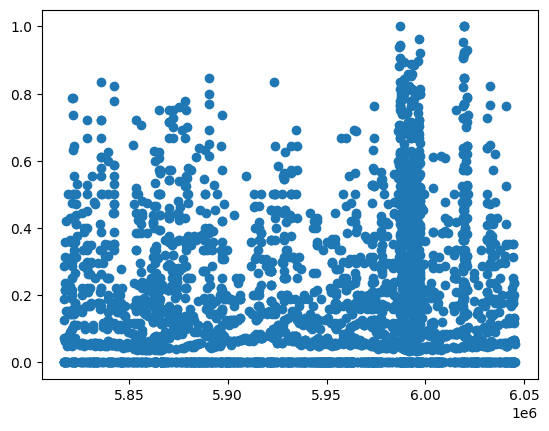

In [20]:
plt.scatter(pile_coordinates,modified_pile_dict['N:C+m:G']/(valid_pile_dict['N:C+m:G']))

In [21]:
print(valid_pile_dict['N:A+m:N'])

[ 0. 14. 17. ...  0. 17. 17.]


In [22]:
baseline_output_dir = '/clusterfs/nilah/oberon/dimelo_dev_source/test_outputs/baseline'
megalodon_sample_name = 'gm12878_ctcf_megalodon'
aggregated_counts = pd.read_sql("SELECT * from methylationAggregate_" + megalodon_sample_name, 
                        sqlite3.connect(baseline_output_dir + "/" + megalodon_bam_filepath.split("/")[-1]
                                        .replace(".bam", "") + ".db"))

In [23]:
a_counts = aggregated_counts[aggregated_counts['mod']=='A+Y'].sort_values(by='pos',ascending=True)

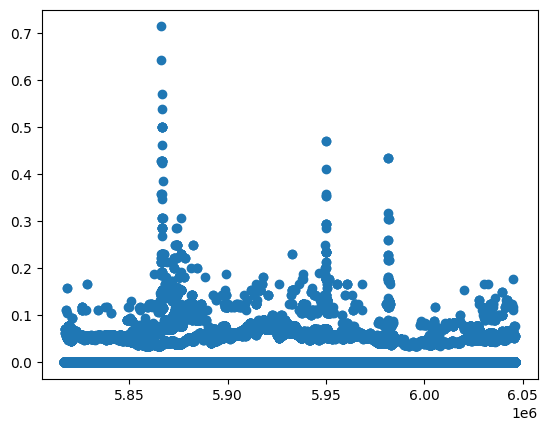

In [24]:
# plt.figure(figsize=(10,2.5))
plt.scatter(a_counts['pos'],a_counts['methylated_bases']/a_counts['total_bases'])

In [25]:
print(a_counts['total_bases'])

15857     14
16135     17
16136     17
16137     17
16138     17
          ..
141054    17
141053    17
141052    17
141051    17
141050    17
Name: total_bases, Length: 143442, dtype: int64


In [26]:
print(len(a_counts['methylated_bases']),len(modified_pile_dict['N:A+m:N']))

143442 229376


In [27]:
baseline_coordinates = {x:y for x,y in zip(a_counts['pos'],a_counts['methylated_bases']/a_counts['total_bases'])}
new_package_coordinates = {x:y for x,y in zip(pile_coordinates,modified_pile_dict['N:A+m:N']/(valid_pile_dict['N:A+m:N']))}

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [28]:
diff_by_coordinates = {x:new_package_coordinates[x]-baseline_coordinates[x] for x in baseline_coordinates if x in new_package_coordinates}

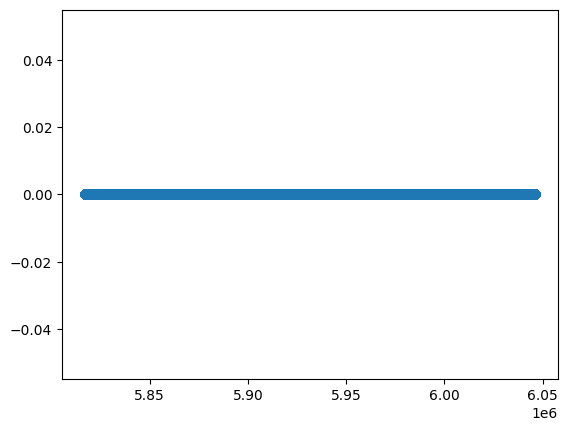

In [29]:
plt.scatter(diff_by_coordinates.keys(),diff_by_coordinates.values())

In [18]:
print(len(diff_by_coordinates))

143442


/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


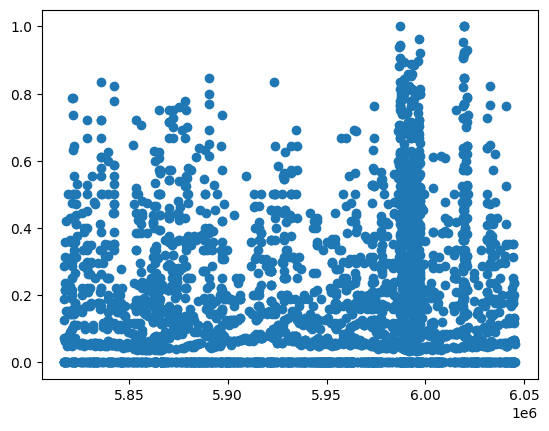

In [25]:
plt.scatter(pile_coordinates,modified_pile_dict['N:C+m:G']/(valid_pile_dict['N:C+m:G']))

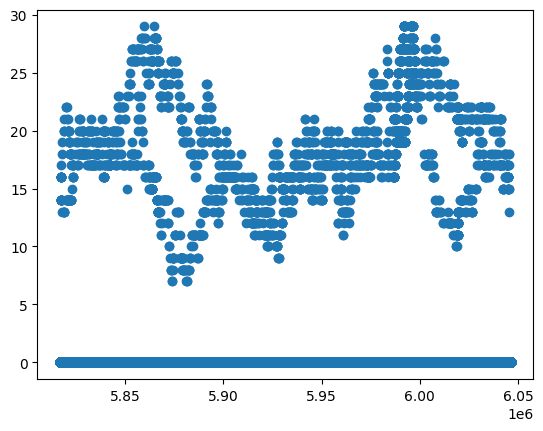

In [26]:
plt.scatter(pile_coordinates,valid_pile_dict['N:C+m:G'])

In [12]:
c_counts = aggregated_counts[aggregated_counts['mod']=='C+Z'].sort_values(by='pos',ascending=True)

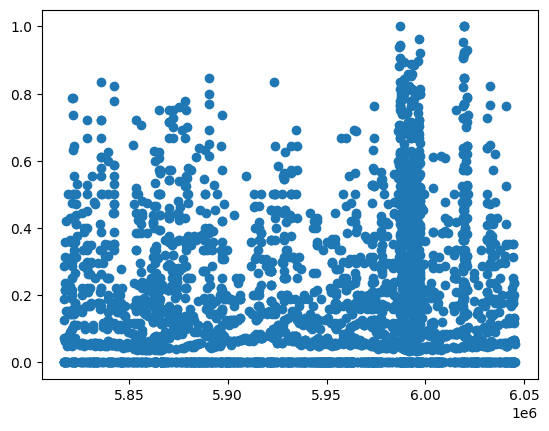

In [13]:
plt.scatter(c_counts['pos'],c_counts['methylated_bases']/c_counts['total_bases'])

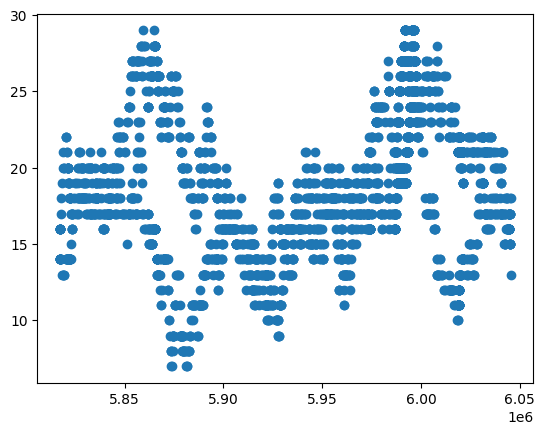

In [14]:
plt.scatter(c_counts['pos'],c_counts['total_bases'])

In [15]:
c_baseline_coordinates = {x:y for x,y in zip(c_counts['pos'],c_counts['methylated_bases']/c_counts['total_bases'])}
c_new_package_coordinates = {x:y for x,y in zip(pile_coordinates,modified_pile_dict['N:C+m:G']/(valid_pile_dict['N:C+m:G']))}

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [16]:
c_diff_by_coordinates = {x:c_new_package_coordinates[x]-c_baseline_coordinates[x] 
                       for x in c_baseline_coordinates if x in c_new_package_coordinates}

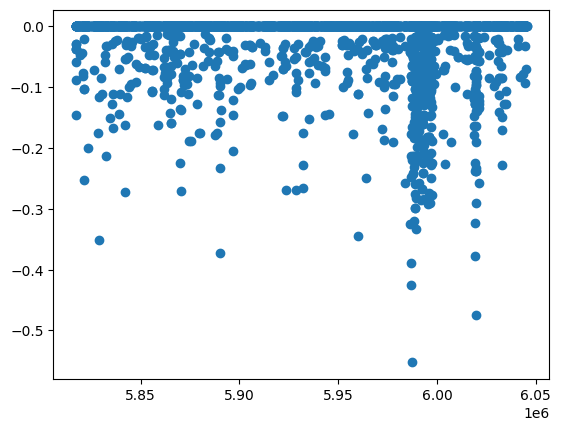

In [17]:
plt.scatter(c_diff_by_coordinates.keys(),c_diff_by_coordinates.values())

In [8]:
=start_time = time.time()
(hp1_pile_coordinates,hp1_valid_pile_dict,hp1_modified_pile_dict) = dm.parse_bam(
    hp1_bam_filepath,
    'test',output_dir,
    basemods=('N:A+m:N','N:C+m:G'),
    region='chr11:5816896-6046272',
    referenceGenome=genome_path)
end_time = time.time()
print(end_time-start_time)

chr11 5816896 6046272
5816896 6046271
read pos 5835500
9.660791873931885
